# NXCALS Examples

## MWPC

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# source the nxcals python libs
from nxcals.api.extraction.data.builders import *
from scipy.optimize import curve_fit

# build the query and load data into spark dataframe UTC Time
start = "2022-07-13 14:56:00.000"
end = "2022-07-13 15:00:00.000"
df = DevicePropertyDataQuery.builder(spark).system("CMW").startTime(start).endTime(end).entity().parameter("BXMWPC_2080/Acquisition").build()

In [86]:
df

DataFrame[__record_timestamp__: bigint, __record_version__: bigint, acqMsg: string, acqStamp: bigint, acqState: int, acqTime: string, beamID: int, class: string, coincidenceDeviceName: string, cycleTime: string, cyclestamp: bigint, device: string, deviceDetailedStatus: int, deviceHwStatus: int, deviceName: string, equipmentName: string, event: int, gasOk: int, highVoltage: double, highVoltageMode: int, highVoltageOn: int, highVoltageStatus: int, inOutPosition: int, moduleWdAcquisition: int, moduleWdMonitor: int, profileHoriz: struct<elements:array<double>,dimensions:array<int>>, profileHorizFiltered: struct<elements:array<double>,dimensions:array<int>>, profileHorizOffset1: struct<elements:array<double>,dimensions:array<int>>, profileHorizOffset8: struct<elements:array<double>,dimensions:array<int>>, profileVert: struct<elements:array<double>,dimensions:array<int>>, profileVertFiltered: struct<elements:array<double>,dimensions:array<int>>, profileVertOffset1: struct<elements:array<doub

In [87]:
p_df = df.toPandas()

In [88]:
p_df.keys()

Index(['__record_timestamp__', '__record_version__', 'acqMsg', 'acqStamp',
       'acqState', 'acqTime', 'beamID', 'class', 'coincidenceDeviceName',
       'cycleTime', 'cyclestamp', 'device', 'deviceDetailedStatus',
       'deviceHwStatus', 'deviceName', 'equipmentName', 'event', 'gasOk',
       'highVoltage', 'highVoltageMode', 'highVoltageOn', 'highVoltageStatus',
       'inOutPosition', 'moduleWdAcquisition', 'moduleWdMonitor',
       'profileHoriz', 'profileHorizFiltered', 'profileHorizOffset1',
       'profileHorizOffset8', 'profileVert', 'profileVertFiltered',
       'profileVertOffset1', 'profileVertOffset8', 'property', 'selector',
       'superCycleNb', 'wireSpacingHorz', 'wireSpacingVert',
       'nxcals_entity_id'],
      dtype='object')

In [89]:
p_df.profileHoriz[0]["elements"]

array([0.19042969, 0.17578125, 0.22460938, 0.1953125 , 0.19042969,
       0.22460938, 0.20507812, 0.25390625, 0.234375  , 0.29296875,
       0.34667969, 0.41992188, 0.57617188, 0.88378906, 1.39160156,
       2.04101562, 2.84179688, 3.08105469, 2.3046875 , 1.22070312,
       0.60546875, 0.40039062, 0.3515625 , 0.27832031, 0.24902344,
       0.23925781, 0.23925781, 0.20019531, 0.18554688, 0.1953125 ,
       0.17089844, 0.18066406, 1.50878906, 1.3671875 , 1.77246094,
       1.59179688, 1.53808594, 1.81640625, 1.66015625, 2.00195312,
       1.84082031, 2.29492188, 2.76367188, 3.359375  , 4.609375  ,
       7.00195312, 9.99511719, 9.99511719, 9.99511719, 9.99511719,
       9.99511719, 9.75585938, 4.84375   , 3.203125  , 2.8125    ,
       2.22167969, 2.01660156, 1.953125  , 1.88476562, 1.56738281,
       1.48925781, 1.6015625 , 1.39160156, 1.45019531])

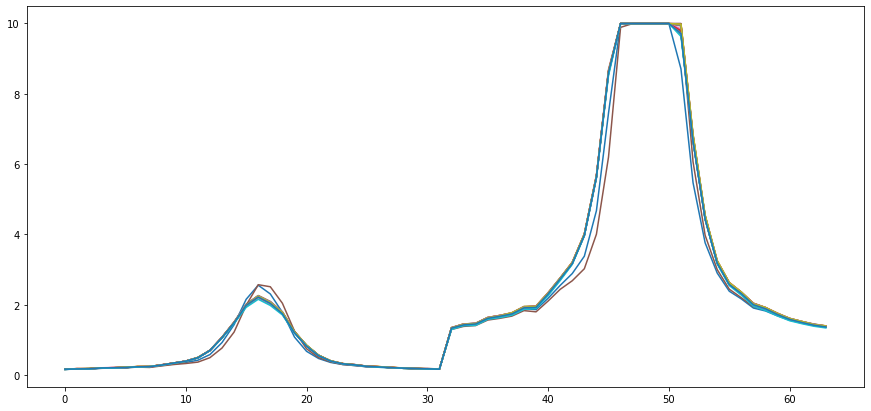

In [90]:
fig, ax = plt.subplots(figsize=(15,7))
for i in range(len(p_df)):
    ax.plot(p_df.profileVert[i]["elements"])

In [91]:
def gaussian_function(x, a, I, mu, sig):
    return a + I / np.sqrt(2 * np.pi * sig ** 2) * np.exp(-(x - mu) ** 2 / 2. / sig ** 2)

def do_gaussian_fit(x,y):
    mu = np.average(x, weights=np.abs(y - np.min(y)))
    sigma = np.sqrt(np.average(x**2, weights=np.abs(y - np.min(y))) - mu**2)
    p0 = [y.min(), (np.max(y) - np.min(y)) * np.sqrt(2 * np.pi * sigma**2), mu, sigma]
    popt, pcov = curve_fit(gaussian_function, x, y, p0=p0, maxfev=1000) # maxfev is the number of tries it does the fit
    return popt, pcov

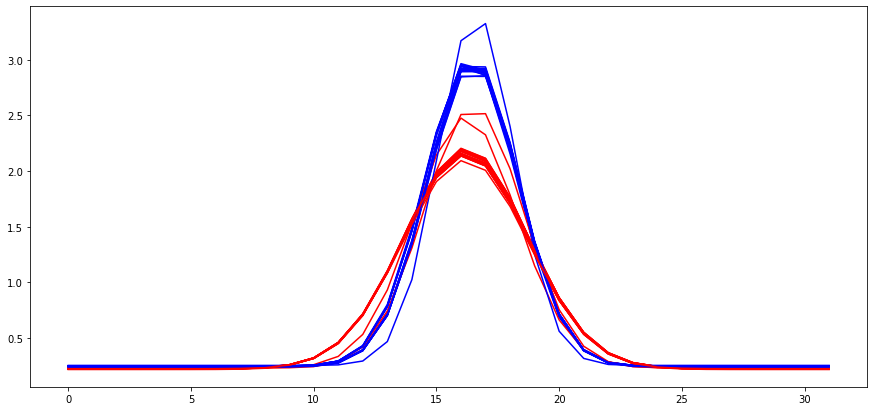

In [92]:
fig, ax = plt.subplots(figsize=(15,7))
HSigma_list = []
for i in range(len(p_df)):
#     ax.plot(p_df.profileHoriz[i]["elements"][0:32], color="b")
#     ax.plot(p_df.profileVert[i]["elements"][0:32], color="r")
    
    Hy = p_df.profileHoriz[i]["elements"][0:32]
    Hx = np.linspace(0,len(Hy)-1, len(Hy))

    popt, pcov = do_gaussian_fit(Hx, Hy)
    ax.plot(Hx, gaussian_function(Hx, popt[0], popt[1], popt[2], popt[3]), color="b")
    
    Hy = p_df.profileVert[i]["elements"][0:32]
    Hx = np.linspace(0,len(Hy)-1, len(Hy))

    popt, pcov = do_gaussian_fit(Hx, Hy)
    ax.plot(Hx, gaussian_function(Hx, popt[0], popt[1], popt[2], popt[3]), color="r")
    
    HSigma_list.append(abs(popt[3]))

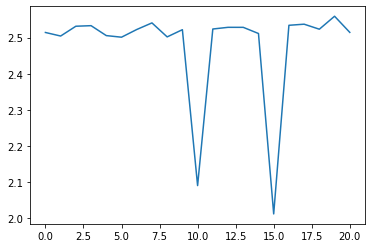

In [84]:
fig, ax = plt.subplots()
ax.plot(HSigma_list)

In [ ]:
# sc.stop()
# spark.stop()

## IRRAD BPM

In [21]:
# build the query and load data into spark dataframe
start = "2022-07-09 23:50:00.000"
end = "2022-07-12 00:00:00.000"
df_bpm = DevicePropertyDataQuery.builder(spark).system("CMW").startTime(start).endTime(end).entity().parameter("IRRAD_BPM1/Acquisition").build()

In [22]:
df_bpm = df_bpm.toPandas()

In [10]:
df_bpm.keys()

Index(['__record_timestamp__', '__record_version__', 'acqStamp', 'class',
       'cyclestamp', 'device', 'intensity', 'property', 'selector', 'x', 'y',
       'nxcals_entity_id'],
      dtype='object')

In [11]:
df_bpm.acqStamp.iloc[-1]

1657531008000000000

In [12]:
now = datetime.now()

timestamp = datetime.timestamp(now)
print("timestamp =", timestamp)

timestamp = 1657703842.66507


In [13]:
from datetime import datetime

timestamp = df_bpm.acqStamp.iloc[-1]/1e9
dt_object = datetime.fromtimestamp(timestamp)

print("dt_object =", dt_object)
print("type(dt_object) =", type(dt_object))

dt_object = 2022-07-11 11:16:48
type(dt_object) = <class 'datetime.datetime'>


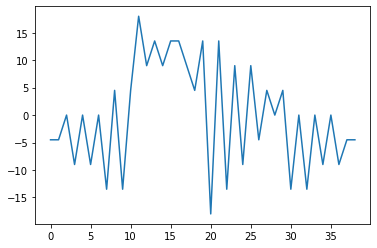

In [14]:
fig, ax = plt.subplots()
ax.plot(df_bpm.x[0]["elements"])

### Channel01

In [41]:
# build the query and load data into spark dataframe
start = "2022-01-09 23:50:00.000"
end = "2022-07-12 00:00:00.000"
df_bpm_c1 = DevicePropertyDataQuery.builder(spark).system("CMW").startTime(start).endTime(end).entity().parameter("IRRAD_BPM1/Channel01").build()

In [42]:
df_bpm_c1 = df_bpm_c1.toPandas()

In [43]:
df_bpm_c1

__record_timestamp__  __record_version__             acqStamp  \
0        1651708802000000000                   0  1651708802000000000   
1        1651708812000000000                   0  1651708812000000000   
2        1651708822000000000                   0  1651708822000000000   
3        1651708833000000000                   0  1651708833000000000   
4        1651708841000000000                   0  1651708841000000000   
...                      ...                 ...                  ...   
206702   1648044477000000000                   0  1648044477000000000   
206703   1648044508000000000                   0  1648044508000000000   
206704   1648044539000000000                   0  1648044539000000000   
206705   1647968783264000000                   0  1647968783264000000   
206706   1647968783265000000                   0  1647968783265000000   

            class  cyclestamp      device  intensity   property selector    x  \
0       IRRAD_BPM           0  IRRAD_BPM1   0.071700  Channel01     None -4.5   
1       IRRAD_BPM           0  IRRAD_BPM1   0.070575  Channel01     None -4.5   
2       IRRAD_BPM           0  IRRAD_BPM1   0.067575  Channel01     None -4.5   
3       IRRAD_BPM           0  IRRAD_BPM1   0.075950  Channel01     None -4.5   
4       IRRAD_BPM           0  IRRAD_BPM1   0.071450  Channel01     None -4.5   
...           ...         ...         ...        ...        ...      ...  ...   
206702  IRRAD_BPM           0  IRRAD_BPM1   0.041825  Channel01     None -4.5   
206703  IRRAD_BPM           0  IRRAD_BPM1   0.045450  Channel01     None -4.5   
206704  IRRAD_BPM           0  IRRAD_BPM1   0.046575  Channel01     None -4.5   
206705  IRRAD_BPM           0  IRRAD_BPM1   0.025450  Channel01     None -4.5   
206706  IRRAD_BPM           0  IRRAD_BPM1   0.025450  Channel01     None -4.5   

          y  nxcals_entity_id  
0      -9.0          47634412  
1      -9.0          47634412  
2      -9.0          47634412  
3      -9.0          47634412  
4      -9.0          47634412  
...     ...               ...  
206702 -9.0          47634412  
206703 -9.0          47634412  
206704 -9.0          47634412  
206705 -9.0          47634412  
206706 -9.0          47634412  

[206707 rows x 12 columns]

In [44]:
df_bpm_c1.keys()

Index(['__record_timestamp__', '__record_version__', 'acqStamp', 'class',
       'cyclestamp', 'device', 'intensity', 'property', 'selector', 'x', 'y',
       'nxcals_entity_id'],
      dtype='object')

In [56]:
timestamp = df_bpm_c1.acqStamp.iloc[0]/1e9
dt_object = datetime.fromtimestamp(timestamp)

print("dt_object =", dt_object)
print("type(dt_object) =", type(dt_object))

dt_object = 2022-05-05 02:00:02
type(dt_object) = <class 'datetime.datetime'>


In [50]:
timestamp = df_bpm_c1.acqStamp.iloc[-1]/1e9
dt_object = datetime.fromtimestamp(timestamp)

print("dt_object =", dt_object)
print("type(dt_object) =", type(dt_object))

dt_object = 2022-03-22 18:06:23.265000
type(dt_object) = <class 'datetime.datetime'>


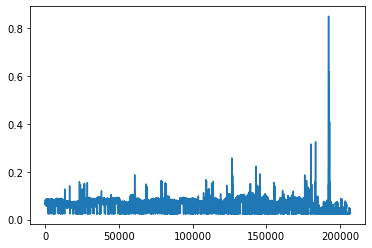

In [57]:
fig, ax = plt.subplots()
ax.plot(df_bpm_c1.intensity)